In [1]:
import warnings
warnings.filterwarnings("ignore") # Disables all warning messages that might appear while running the code
import pandas as pd # Library for data manipulation and analysis tool
import seaborn as sns #Data visualization library
import numpy as np #Numpy library for scientific computing with Python
import gensim.parsing.preprocessing as gsp # open-source natural language processing library
from gensim import utils # Importing utils module from gensim
from wordcloud import WordCloud #Importing wordlcloud module
from tqdm import tqdm #: Imports the tqdm library which is a progress bar utility for Python
from sklearn.metrics import confusion_matrix # Imports the confusion_matrix function from the sklearn library which is a performance metric for classification algorithms
import nltk # A popular library for natural language processing
nltk.download('punkt') # Downloads the Punkt tokenizer which is a pre-trained unsupervised machine learning model for tokenization
nltk.download('stopwords') # Downloading a list of stopwords (commonly used words that do not add meaning to the text) from the nltk library
nltk.download('wordnet') # Downloading the WordNet lexical database which is a large lexical database of English
nltk.download('omw-1.4') # Downloading the Open Multilingual WordNet which is an extension of the original WordNet
from nltk.tokenize import word_tokenize #Importing the word_tokenize function from the nltk library which is used for tokenization
from nltk.corpus import stopwords #Importing the stopwords from the nltk library
from nltk.stem import WordNetLemmatizer #Importing the WordNetLemmatizer class from the nltk library which is used for lemmatization
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline # Importing various modules from the sklearn library which is a machine learning library for Python
from scipy.sparse import csr_matrix # Importing the csr_matrix function from the scipy library which is used for creating compressed sparse row matrices
from sklearn.model_selection import train_test_split # Importing the train_test_split function from the sklearn library which is used for splitting data into training and testing sets
import scipy.sparse as sp #Importing the scipy.sparse module which provides sparse matrix data structures and associated algorithms
import heapq # Importing the heapq module which is used for heap operations such as heappush and heappop
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/dataset.csv'
df = pd.read_csv(path)

Mounted at /content/drive


In [3]:
# Loading data into a pandas dataframe and printing out its sample.
# df = pd.read_csv(r"D:\Project - Sentiment Analysis\dataset.csv")
df.head(10)

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
5,It sucks for me since I'm focused on the natur...,en,negative
6,@en_font Treballar a l’obra a partir dels 19 a...,ca,negative
7,@ShawnTarloff @itsmieu you can also relate thi...,en,uncertainty
8,Social Security. Constant political crises dis...,en,negative
9,@FilmThePoliceLA A broken rib can puncture a l...,en,negative


In [4]:
# Printing the shape of data to know its size.
df.shape # 937854 rows and 3 columns

(937854, 3)

We can see that the data contains only 3 columns that are self-explanatory.

In [5]:
# Applying the "describe" command to generate the descriptive statistics of the dataset.
df.describe()

,Text,Language,Label
count,937854,937831,937854
unique,929544,72,4
top,@FlylightsTech Good project,en,positive
freq,73,871310,264545


Looking at the statistics, we can see that there are a total of 72 languages present in this dataset while also featuring a few rows that have language as null. To ensure the relevance of this project, we will be limiting our analysis to English language text only, thus eliminating any other languages from the comparison of the performance of the models.









In [6]:
df = df.query("Language == 'en'").copy()

Now that we only have the data with the required language, we're going to make a picture to show how often each item in the 'Label' column appears. We'll use a special kind of graph called a countplot, which uses bars to show how many times each item appears.

Text(0, 0.5, 'Count of rows')

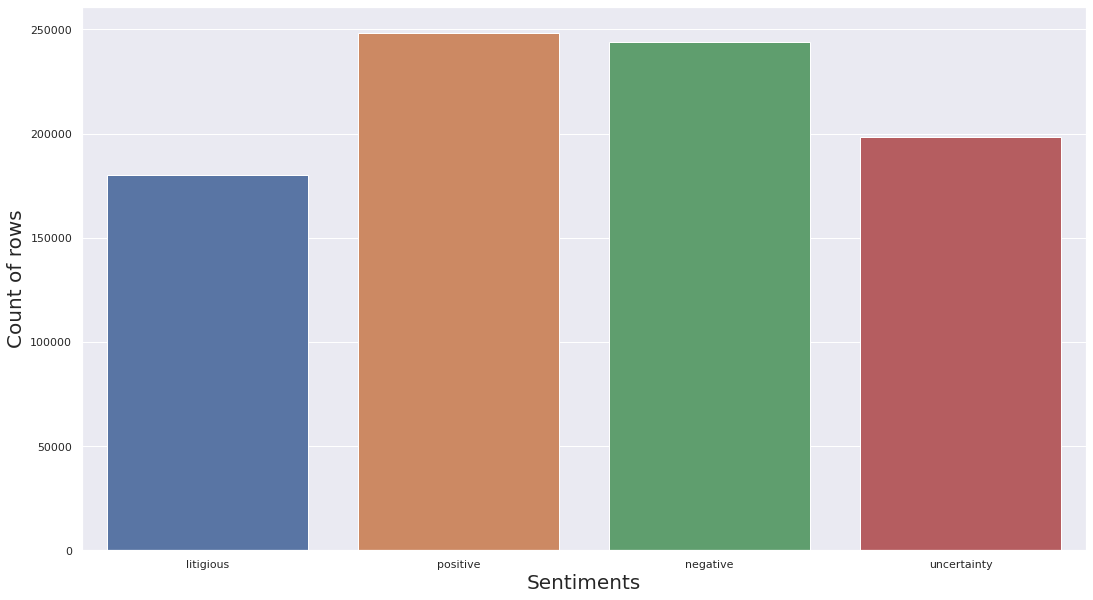

In [7]:
# Count of labels.
sns.set(rc={'figure.figsize':(18,10)})
seaborn_plot = sns.countplot(df['Label'])
seaborn_plot.set_xlabel("Sentiments",fontsize=20)
seaborn_plot.set_ylabel("Count of rows",fontsize=20)

The dataset is well-balanced and should lead to unbiased predictions.

In [8]:
#Cleaning the text
filters = [
    gsp.strip_tags,
    gsp.strip_punctuation,
    gsp.strip_multiple_whitespaces,
    gsp.strip_numeric,
    gsp.remove_stopwords,
    gsp.strip_short,
    gsp.stem_text
]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s
df['cleaned_text'] = df['Text'].apply(clean_text)

This code is defining a list called "filters" that contains several cleaning functions for text. These functions include stripping tags, punctuation, extra whitespaces, numeric characters, stopwords and short words, and stemming the text. Then, the code defines a function called "clean_text" that takes in a string, converts it to lowercase, converts it to unicode and applies the cleaning functions defined in the "filters" list in sequence to the input string and return the cleaned text.

Next, we will generate a word cloud to identify the most frequently used words in each existing label:

In [9]:
import matplotlib.pyplot as plt
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800,
                                  background_color = 'black',
                                  stopwords = None,
                                  min_font_size = 10).generate(text)
    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud_instance)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [10]:
def plot_word_cloud_for_sentiment(sentiment):
    text_df = df[df['Label'] == sentiment]
    # texts = " ".join(text_df['cleaned_text']
    # print(texts)
    # return 0
    print(f'Sentiment:-{sentiment}')
    # plot_word_cloud(text_df['cleaned_text'])
    plot_word_cloud(str(text_df['cleaned_text']))


Sentiment:-litigious


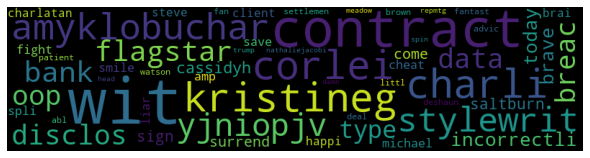

Sentiment:-positive


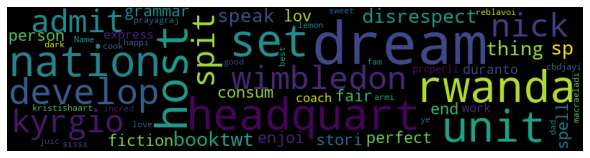

Sentiment:-negative


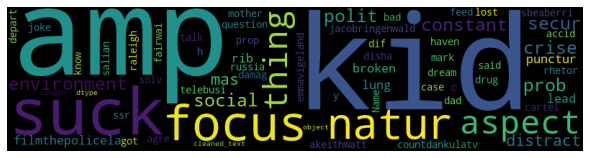

Sentiment:-uncertainty


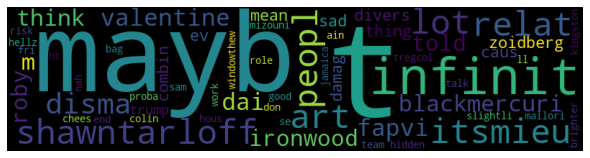

In [11]:
for sentiment in df['Label'].unique():
    plot_word_cloud_for_sentiment(sentiment)

It is evident that the keywords associated with each sentiment vary, suggesting that incorporating the presence of specific words as a feature in our prediction will greatly help in accuracy.

# Bag of Words
Bag of Words (BOW) is a simple and straightforward approach to representing text data. It involves tokenizing the text into individual words and counting the number of occurrences of each word in a document. The resulting representation is a vector of word counts, where each element corresponds to a unique word in the vocabulary.

In [13]:
# Creating the Bag of Words model
from collections import Counter
word2count = Counter()
for row in tqdm(df.iloc[:, 3]):
    words = nltk.word_tokenize(row)
    word2count.update(words)

100%|██████████| 871310/871310 [02:18<00:00, 6309.20it/s]


This code is counting the occurrences of each word in the third column of the dataframe "df" and storing them in a dictionary called "word2count". The "nltk" library is used to tokenize the text, which separates it into individual words. The loop iterates through each row in the dataframe, tokenizes the text in the third column, and then counts the occurrences of each word. The words are stored as keys in the dictionary, and their counts are stored as values.

In [14]:
# This code is creating a feature vector for each row in the data set. The feature vector will have a length of 10000, 
# representing the top 10000 most frequently occurring words.

freq_words = heapq.nlargest(1000, word2count, key=word2count.get)

In [15]:
df['tokens'] = df['cleaned_text'].apply(nltk.word_tokenize)

df_x = []
for text in tqdm(df.iloc[:, -1]):
    vec = [1 if word in text else 0 for word in freq_words]
    vec = csr_matrix(vec)
    df_x.append(vec)

100%|██████████| 871310/871310 [09:31<00:00, 1525.33it/s]


This code loops through each text in a dataframe and creates a vector for each text indicating the presence or absence of the most frequent words in the text. It uses the "csr_matrix" function to store these vectors in a sparse matrix format to save memory. The resulting matrix can be used as input data for a machine learning model.

In [16]:
# Encoding numeric values to the target variable
replace_map = {'negative': 0, 'positive': 1, 'litigious': 2, 'uncertainty': 3}
df_y = df['Label'].map(replace_map)

In [17]:
# Splitting the data and training it on the Naive Bayes model.
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,stratify=df_y)

In [18]:
training_data = sp.vstack(x_train)
test_data = sp.vstack(x_test)

The code is transforming a list of sparse matrices into a single sparse matrix. The sp.vstack function from the scipy library is being used to vertically stack the sparse matrices in the x_train list into one large sparse matrix called training_data. The same process is being repeated for the x_test list to create a test_data sparse matrix. This step is often done to prepare the data for training or testing in a machine learning model.

In [19]:
# Fitting NB to the training set
# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(training_data,y_train)

ComplementNB()

Complement Naive Bayes (ComplementNB) is a variant of the Naive Bayes algorithm that suits well for high-dimensional sparse data, which is commonly seen in text data, making it a good choice for text classification problems.

In [20]:
y_pred = classifier.predict(test_data)

Making predictions and evaluating performance with the help of a confusion matrix:

In [21]:
cm = confusion_matrix(y_test, y_pred)

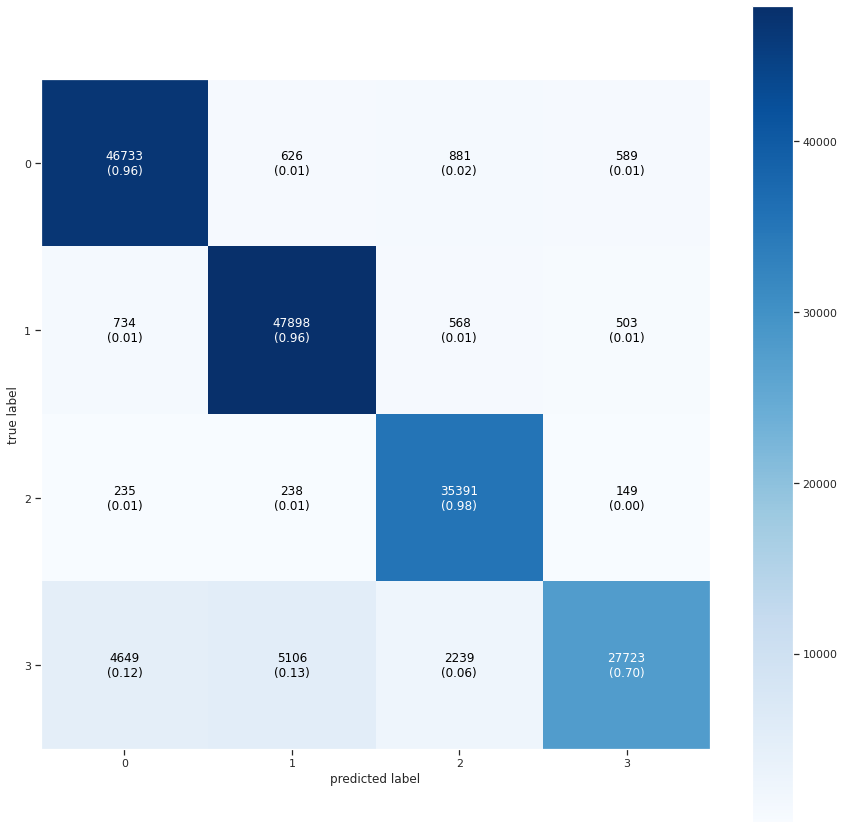

In [22]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(15, 15))
plt.show()

This confusion matrix is a 4x4 matrix that shows the performance of a multi-class classification model. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. The diagonal elements represent the number of correctly classified instances for each class. In this matrix, the first row shows the number of instances that were correctly classified as belonging to the first (negative) class, and the first column shows the number of instances that actually belong to the first (negative) class. The other rows and columns follow the same pattern for the other classes (labels). For example, the element in the first row and second column (646) represents the number of instances that were actually in the second (postive) class, but were misclassified as belonging to the first (negative) class.

In [23]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Accuracy: 0.9052174312242486

Accuracy: 0.9052174312242486


In [24]:
# df['tokens'] = df['cleaned_text'].apply(nltk.word_tokenize)

# TF-IDF
TF-IDF stands for term frequency-inverse document frequency. It is a numerical statistic that is intended to reflect how important a word is to a document in a corpus. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. It is often used as a weighting factor in information retrieval and text mining. The goal of using TF-IDF is to convert text documents into a set of numerical features that can be used in machine learning algorithms.

In [25]:
#Preprocessing the text data
# ref: https://www.askpython.com/python/examples/tf-idf-model-from-scratch

sentences = []
word_set = set()

for text in tqdm(df.iloc[:, -1]):
    x = [word.lower() for word in text if word.isalpha()]
    sentences.append(x)
    word_set.update(x)

# Total documents in our corpus
total_documents = len(sentences)

# Creating an index for each word in our vocab.
index_dict = {word: i for i, word in enumerate(word_set)}


100%|██████████| 871310/871310 [00:11<00:00, 74243.87it/s]


The code is processing a dataset of text documents. It is creating a list of sentences, where each sentence is a list of words, and a set of unique words in the entire dataset. Then, it is counting the total number of documents in the dataset. Finally, it is creating a dictionary that maps each unique word in the dataset to an index in a vector space. This will be useful for calculating the tf-idf value for each word.

In [26]:
#Create a count dictionary

def count_dict(sentences):
    from collections import Counter
    word_count = Counter()
    for sent in sentences:
        word_count.update(sent)
    return dict(word_count)

word_count = count_dict(sentences)

The code defines a function that takes in a list of sentences and returns a dictionary that counts the number of times each word appears in the sentences. The returned dictionary contains each unique word as a key and its corresponding count as the value. The code then calls the function to count the words in the sentences list and stores the resulting dictionary in the variable word_count.

In [27]:
#Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

The function termfreq() calculates the term frequency of a given word in a given document. The term frequency is the number of times a word appears in a document, divided by the total number of words in the document.


In [28]:
#Inverse Document Frequency
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

The function inverse_doc_freq is used to calculate the Inverse Document Frequency (IDF) of a given word. IDF is a measure of how important a word is in a corpus of documents. The formula for IDF is the logarithm of the total number of documents in the corpus divided by the number of documents that contain the word, plus one.

In [29]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
        value = tf * idf
        if word in index_dict:
            tf_idf_vec[index_dict[word]] = value
    return tf_idf_vec


The code tf_idf calculates the TF-IDF vector for a sentence. For each word in the sentence, it calculates its term frequency and inverse document frequency. Then, it multiplies the two values to get the TF-IDF score for that word. If the word is in the index dictionary, it adds the score to the corresponding index in the TF-IDF vector. Finally, it returns the TF-IDF vector for the sentence.

In [30]:
#TF-IDF Encoded text corpus
# next idea trasnpose: uske baad sparse representation
df_x = []
for sent in tqdm(sentences):
    vec = csr_matrix(tf_idf(sent))
    df_x.append(vec)

100%|██████████| 871310/871310 [2:01:47<00:00, 119.23it/s]


This code computes the TF-IDF vector for each sentence in the sentences list, where each sentence is represented as a list of words. It then creates a sparse matrix vec where each row corresponds to a sentence and each column corresponds to a unique word in the entire corpus that gets appended in the empty list df_x. The resulting df_x matrix will be used as the feature matrix for training a machine learning model for text classification.

In [31]:
# Similar to what we did for BOW
replace_map = {'negative': 0, 'positive': 1, 'litigious': 2, 'uncertainty': 3}
df_y = df['Label'].map(replace_map)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,stratify=df_y)

In [32]:
training_data = sp.vstack(x_train)
test_data = sp.vstack(x_test)

In [ ]:
# Fitting CNB to the training set
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(training_data,y_train)

In [ ]:
y_pred = classifier.predict(test_data)
y_pred

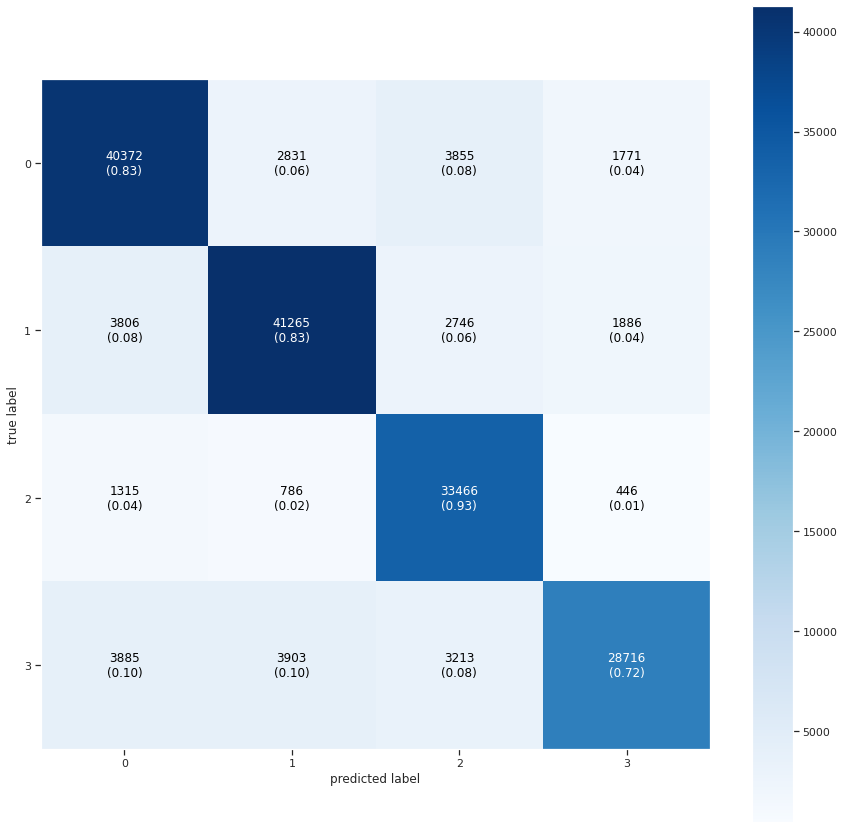

In [35]:
cm = confusion_matrix(y_test, y_pred)

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(15, 15))
plt.show()

The confusion matrix for the TF-IDF model shows fewer correct predictions for all classes compared to the Bag-of-Words (BOW) model, especially for classes 1 and 3. The BOW model correctly predicts the class for the majority of the test instances, whereas the TF-IDF model is slightly worse. It can be concluded that the BOW model performs better for this specific dataset and problem, compared to the TF-IDF model.

In [36]:
predicted = classifier.predict(test_data)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Accuracy: 0.8253032789707452

Accuracy: 0.8253032789707452


# Conclusion
In conclusion, we implemented two popular methods for text representation, Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF), from scratch to build models for sentiment analysis. We also used the Complement Naive Bayes algorithm for classification, which is a powerful and efficient algorithm for text classification. We observed that while both BoW and TF-IDF can be effective in classifying text, the BoW implementation resulted in better accuracy for our dataset. This could be due to the nature of our data or the specifics of our implementation. Nonetheless, our experiments highlight the importance of careful feature engineering and algorithm selection for text classification tasks. With the right techniques, we can create models that can effectively classify texts and provide valuable insights for a wide range of applications.

# References:
https://seaborn.pydata.org/generated/seaborn.countplot.html

https://www.askpython.com/python/examples/tf-idf-model-from-scratch

https://www.youtube.com/@FutureSmartAI

To contact me regarding the article or any other data science stuff, feel free to reach out to me on Linkedin.